<a href="https://colab.research.google.com/github/Ahmadbahar911/machine-learning/blob/main/Copy_of_%5BClustering%5D_Submission_Akhir_BMLP_Ahmad_Bahar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


<h1>About the Dataset
<h5>The Spotify dataset (titled data.csv) consists of 160,000+ tracks sorted by name, from 1921-2020 found in Spotify as of June 2020. Collected by Kaggle user and Turkish Data Scientist Yamaç Eren Ay, the data was retrieved and tabulated from the Spotify Web API. Each row in the dataset corresponds to a track, with variables such as the title, artist, and year located in their respective columns. Aside from the fundamental variables, musical elements of each track, such as the tempo, danceability, and key, were likewise extracted; the algorithm for these values were generated by Spotify based on a range of technical parameters

Data collect from Kaggle : [160k Spotify songs from 1921 to 2020 (Sorted)](https://www.kaggle.com/datasets/fcpercival/160k-spotify-songs-sorted/data)

# **2. Import Library**

In [1]:
from IPython.display import IFrame
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import kagglehub
import os
pd.options.mode.chained_assignment = None
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


# **3. Memuat Dataset**

In [2]:
# Download latest version
path = kagglehub.dataset_download("fcpercival/160k-spotify-songs-sorted")

print("Path to dataset files:", path)

100%|██████████| 13.5M/13.5M [00:00<00:00, 44.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/fcpercival/160k-spotify-songs-sorted/versions/1


In [3]:
# Tampilkan file di dalam folder dataset untuk melihat nama file
print("Files in dataset folder:", os.listdir(path))

Files in dataset folder: ['data.csv', 'Spotify Data.ipynb', 'spotify_eda.html', 'README.md', '.DS_Store']


In [4]:
Spotify  = os.path.join(path, "data.csv")
df_Spotify  = pd.read_csv(Spotify )
df_Spotify .head()

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,0gNNToCW3qjabgTyBSjt3H,!Que Vida! - Mono Version,['Love'],220560,11/1/66,1966,0.5250,0.600,0.540,0.00305,0.100,-11.803,0.0328,125.898,0.547,1,9,26,0
1,0tMgFpOrXZR6irEOLNWwJL,"""40""",['U2'],157840,2/28/83,1983,0.2280,0.368,0.480,0.70700,0.159,-11.605,0.0306,150.166,0.338,1,8,21,0
2,2ZywW3VyVx6rrlrX75n3JB,"""40"" - Live",['U2'],226200,8/20/83,1983,0.0998,0.272,0.684,0.01450,0.946,-9.728,0.0505,143.079,0.279,1,8,41,0
3,6DdWA7D1o5TU2kXWyCLcch,"""40"" - Remastered 2008",['U2'],157667,2/28/83,1983,0.1850,0.371,0.545,0.58200,0.183,-9.315,0.0307,150.316,0.310,1,8,37,0
4,3vMmwsAiLDCfyc1jl76lQE,"""40"" - Remastered 2008",['U2'],157667,2/28/83,1983,0.1850,0.371,0.545,0.58200,0.183,-9.315,0.0307,150.316,0.310,1,8,35,0


In [5]:
# the deletion of these columns id, release_date, liveness
df_Spotify.drop(["id", "release_date", "liveness"], axis=1, inplace=True)
df_Spotify.head()

,name,artists,duration_ms,year,acousticness,danceability,energy,instrumentalness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,!Que Vida! - Mono Version,['Love'],220560,1966,0.5250,0.600,0.540,0.00305,-11.803,0.0328,125.898,0.547,1,9,26,0
1,"""40""",['U2'],157840,1983,0.2280,0.368,0.480,0.70700,-11.605,0.0306,150.166,0.338,1,8,21,0
2,"""40"" - Live",['U2'],226200,1983,0.0998,0.272,0.684,0.01450,-9.728,0.0505,143.079,0.279,1,8,41,0
3,"""40"" - Remastered 2008",['U2'],157667,1983,0.1850,0.371,0.545,0.58200,-9.315,0.0307,150.316,0.310,1,8,37,0
4,"""40"" - Remastered 2008",['U2'],157667,1983,0.1850,0.371,0.545,0.58200,-9.315,0.0307,150.316,0.310,1,8,35,0


In [6]:
df_Spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169907 entries, 0 to 169906
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              169907 non-null  object 
 1   artists           169907 non-null  object 
 2   duration_ms       169907 non-null  int64  
 3   year              169907 non-null  int64  
 4   acousticness      169907 non-null  float64
 5   danceability      169907 non-null  float64
 6   energy            169907 non-null  float64
 7   instrumentalness  169907 non-null  float64
 8   loudness          169907 non-null  float64
 9   speechiness       169907 non-null  float64
 10  tempo             169907 non-null  float64
 11  valence           169907 non-null  float64
 12  mode              169907 non-null  int64  
 13  key               169907 non-null  int64  
 14  popularity        169907 non-null  int64  
 15  explicit          169907 non-null  int64  
dtypes: float64(8), int64

In [7]:
print(df_Spotify["mode"].unique()) # Should be either 0 or 1
print(df_Spotify["key"].unique()) # Should be values from 0 to 11
print(df_Spotify["explicit"].unique()) # Should be either 0 or 1

[1 0]
[ 9  8  2  0 10  7  1 11  5  4  3  6]
[0 1]


In [8]:
print(str(df_Spotify["year"].min()) + " – " + str(df_Spotify["year"].max())) # Range: [1921 – 2020]
print(str(df_Spotify["acousticness"].min()) + " – " + str(df_Spotify["acousticness"].max())) # Range: [0.0 – 1.0]
print(str(df_Spotify["danceability"].min()) + " – " + str(df_Spotify["danceability"].max())) # Range: [0.0 – 1.0]
print(str(df_Spotify["energy"].min()) + " – " + str(df_Spotify["energy"].max())) # Range: [0.0 – 1.0]
print(str(df_Spotify["instrumentalness"].min()) + " – " + str(df_Spotify["instrumentalness"].max())) # Range: [0.0 – 1.0]
print(str(df_Spotify["speechiness"].min()) + " – " + str(df_Spotify["speechiness"].max())) # Range: [0.0 – 1.0]
print(str(df_Spotify["valence"].min()) + " – " + str(df_Spotify["valence"].max())) # Range: [0.0 – 1.0]
print(str(df_Spotify["popularity"].min()) + " – " + str(df_Spotify["popularity"].max())) # Range: [0 – 100]

1921 – 2020
0.0 – 0.996
0.0 – 0.988
0.0 – 1.0
0.0 – 1.0
0.0 – 0.969
0.0 – 1.0
0 – 100


In [9]:
#df_Spotify[df_Spotify.duplicated()]

In [10]:
#df_Spotify.drop_duplicates(inplace=True)
#df_Spotify[df_Spotify.duplicated()]

# **4. Exploratory Data Analysis (EDA)**


In [11]:
# 1. Informasi Data
print(df_Spotify.info())
print(df_Spotify.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169907 entries, 0 to 169906
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              169907 non-null  object 
 1   artists           169907 non-null  object 
 2   duration_ms       169907 non-null  int64  
 3   year              169907 non-null  int64  
 4   acousticness      169907 non-null  float64
 5   danceability      169907 non-null  float64
 6   energy            169907 non-null  float64
 7   instrumentalness  169907 non-null  float64
 8   loudness          169907 non-null  float64
 9   speechiness       169907 non-null  float64
 10  tempo             169907 non-null  float64
 11  valence           169907 non-null  float64
 12  mode              169907 non-null  int64  
 13  key               169907 non-null  int64  
 14  popularity        169907 non-null  int64  
 15  explicit          169907 non-null  int64  
dtypes: float64(8), int64

Berikut adalah daftar variabel beserta deskripsinya:  

- **id**: Identifier unik untuk setiap lagu.  
- **name**: Judul lagu.  
- **artists**: Artis yang berpartisipasi dalam lagu.  
- **duration_ms**: Durasi lagu dalam milidetik (ms).  
- **release_date**: Tanggal rilis lagu dalam format MM/DD/YYYY, atau minimal YYYY.  
- **year**: Tahun rilis lagu.  
- **acousticness**: Ukuran kepercayaan dari 0.0 hingga 1.0 yang menunjukkan apakah lagu bersifat akustik.  
- **danceability**: Menggambarkan seberapa cocok sebuah lagu untuk menari. Nilai 0.0 adalah yang paling tidak cocok, sedangkan 1.0 adalah yang paling cocok.  
- **energy**: Ukuran dari 0.0 hingga 1.0 yang merepresentasikan intensitas dan aktivitas lagu. Lagu yang energik biasanya terasa cepat dan keras.  
- **instrumentalness**: Memprediksi apakah sebuah lagu tidak memiliki vokal.  
- **liveness**: Mendeteksi keberadaan penonton dalam rekaman.  
- **loudness**: Tingkat kekerasan suara keseluruhan sebuah lagu dalam desibel (dB).  
- **speechiness**: Mendeteksi keberadaan kata-kata yang diucapkan dalam sebuah lagu.  
- **tempo**: Perkiraan tempo keseluruhan sebuah lagu dalam hitungan per menit (BPM).  
- **valence**: Ukuran dari 0.0 hingga 1.0 yang menggambarkan tingkat "positivitas" musikal yang disampaikan oleh sebuah lagu.  
- **mode**: Isi melodi berdasarkan modalitas lagu. 1 = Mayor; 0 = Minor.  
- **key**: Perkiraan nada utama keseluruhan sebuah lagu berdasarkan notasi Pitch Class. Contoh: 0 = C, 1 = C♯/D♭, 2 = D, dan seterusnya.  
- **popularity**: Popularitas lagu, berkisar dari 0-100, di mana 100 adalah yang paling populer berdasarkan algoritma Spotify.  
- **explicit**: Apakah lagu memiliki lirik eksplisit atau tidak. 1 = Ya; 0 = Tidak.  

In [12]:
# 2. Cek Missing Values
missing_values = df_Spotify.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 name                0
artists             0
duration_ms         0
year                0
acousticness        0
danceability        0
energy              0
instrumentalness    0
loudness            0
speechiness         0
tempo               0
valence             0
mode                0
key                 0
popularity          0
explicit            0
dtype: int64


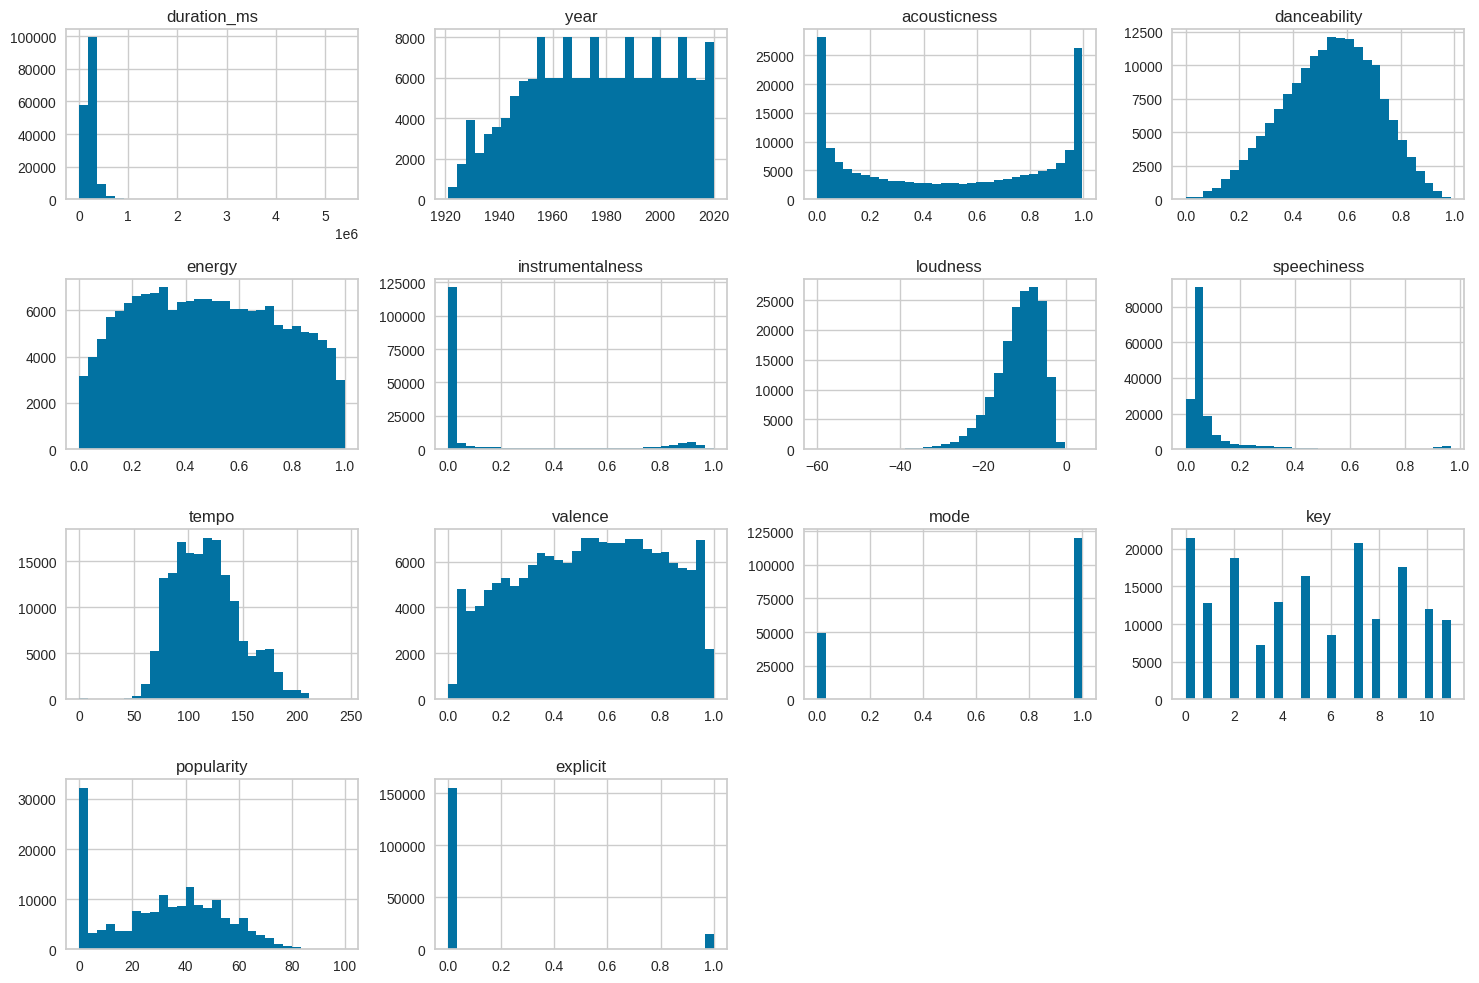

In [13]:
# 3. Distribusi Kolom Numerik
numeric_cols = df_Spotify.select_dtypes(include=['float64', 'int64']).columns
df_Spotify[numeric_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

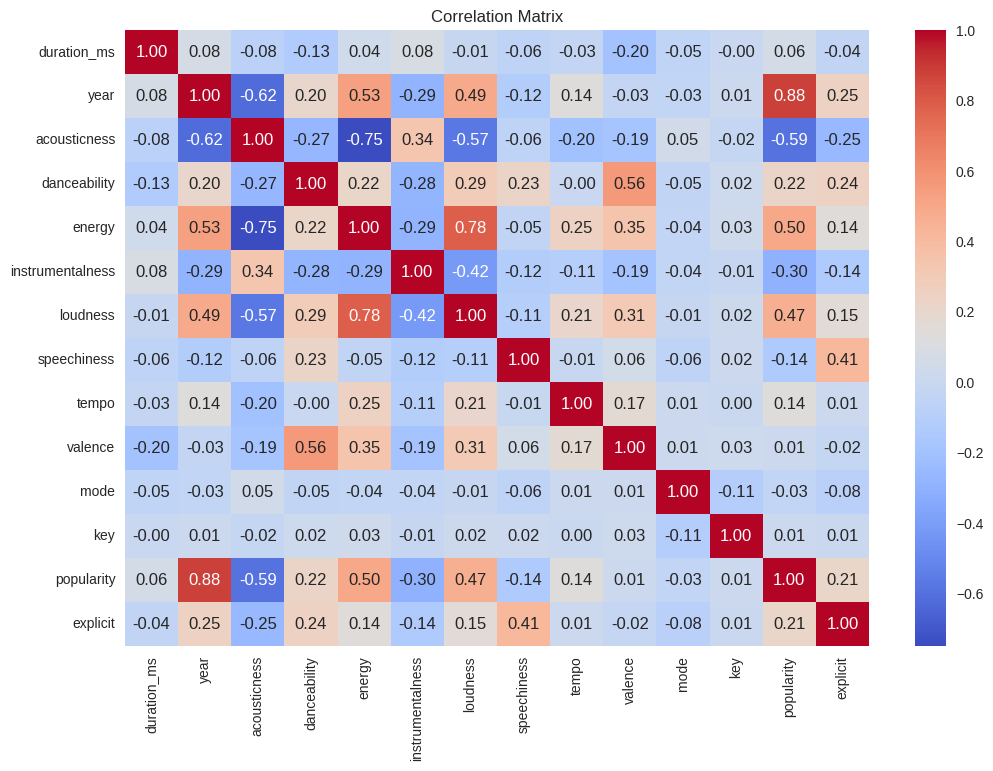

In [14]:
# Filter hanya kolom numerik
numeric_cols = df_Spotify.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_Spotify[numeric_cols].corr()

# Visualisasi heatmap
plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm')

plt.title("Correlation Matrix")
plt.show()

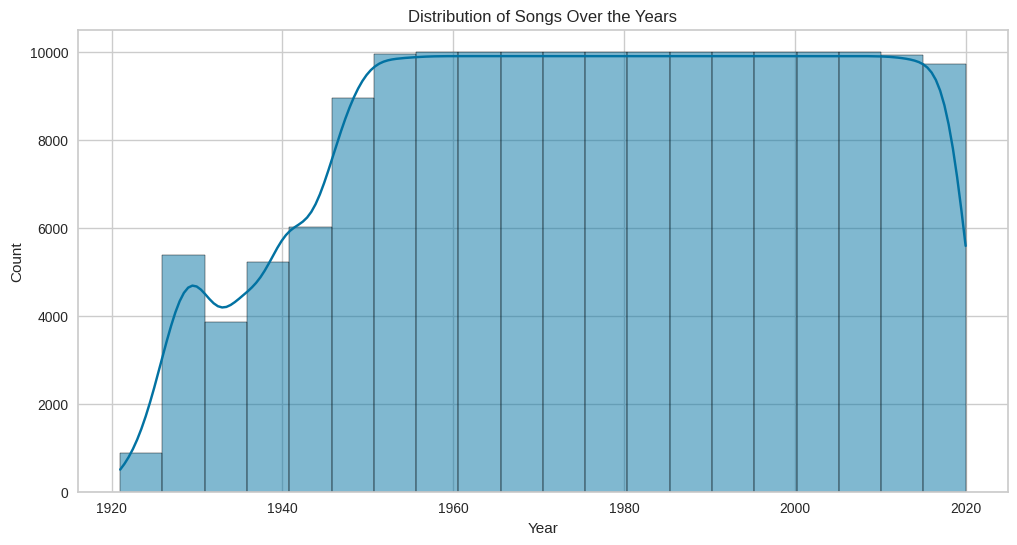

In [15]:
# 5. Distribusi Tahun
plt.figure(figsize=(12, 6))
sns.histplot(df_Spotify['year'], bins=20, kde=True)
plt.title("Distribution of Songs Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

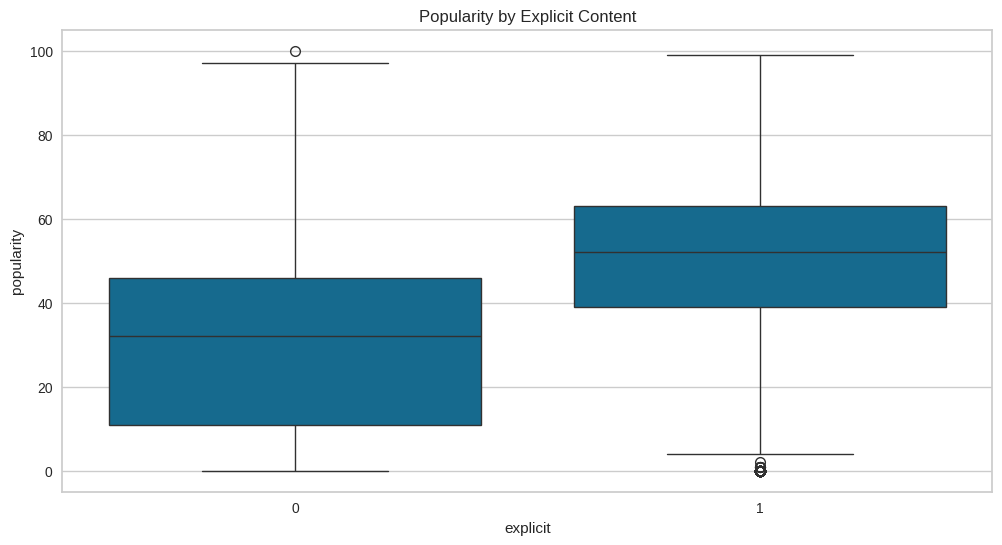

In [16]:
# 6. Popularity Analysis
plt.figure(figsize=(12, 6))

sns.boxplot(x='explicit',
            y='popularity',
            data=df_Spotify)

plt.title("Popularity by Explicit Content")
plt.show()

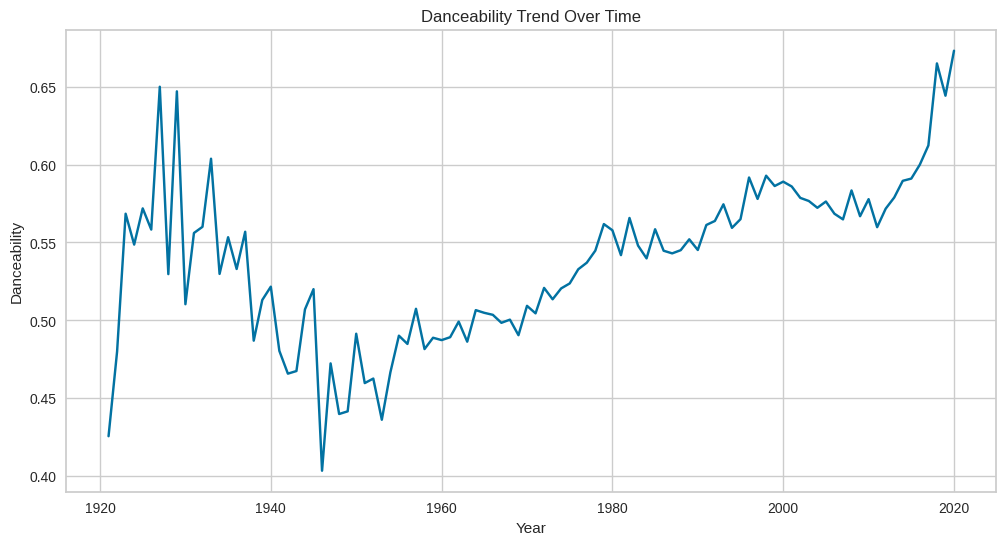

In [17]:
# 7. Danceability Over Time
numeric_cols = df_Spotify.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df_Spotify[numeric_cols]

# Group by 'year' dan hitung rata-rata
df_yearly_mean = df_numeric.copy()
df_yearly_mean['year'] = df_Spotify['year']  # Pastikan 'year' ada di DataFrame
df_yearly_mean = df_yearly_mean.groupby('year').mean().reset_index()

# Plot trend danceability
plt.figure(figsize=(12, 6))

sns.lineplot(x='year',
             y='danceability',
             data=df_yearly_mean)

plt.title("Danceability Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Danceability")
plt.show()


<ipython-input-18-e8d3d1d7ce40>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=popular_songs,


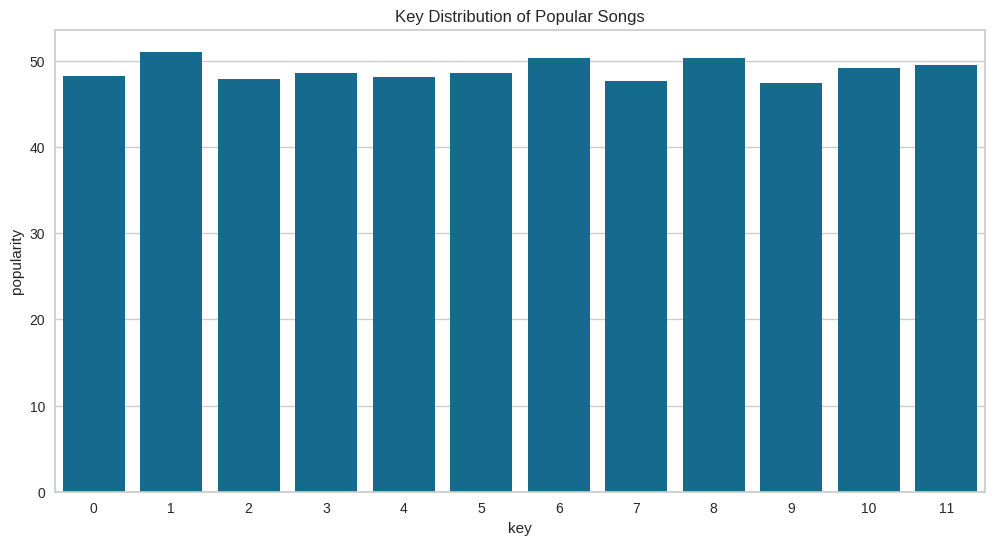

In [18]:
# 8. Feature Comparison for Popular Songs
popular_songs = df_Spotify[df_Spotify['popularity'] > df_Spotify['popularity'].mean()]
plt.figure(figsize=(12, 6))

sns.barplot(data=popular_songs,
            x='key',
            y='popularity',
            ci=None)

plt.title("Key Distribution of Popular Songs")
plt.show()

# **5. Data Preprocessing**

In [19]:
# Cek missing values
print(df_Spotify.isnull().sum())

# Jika ada missing values, lakukan penghapusan atau imputasi
df_Spotify.dropna(inplace=True)  # Menghapus baris dengan missing values (jika ada)


name                0
artists             0
duration_ms         0
year                0
acousticness        0
danceability        0
energy              0
instrumentalness    0
loudness            0
speechiness         0
tempo               0
valence             0
mode                0
key                 0
popularity          0
explicit            0
dtype: int64


In [20]:
# Cek duplikat
print(f"Jumlah duplikat: {df_Spotify.duplicated().sum()}")

# Hapus duplikat
df_Spotify = df_Spotify.drop_duplicates()


Jumlah duplikat: 607


In [21]:
# Fitur numerik
numerical_features = ['duration_ms', 'acousticness', 'danceability', 'energy',
                      'instrumentalness', 'loudness', 'speechiness', 'tempo', 'valence']

# Standarisasi menggunakan Z-Score
scaler = StandardScaler()
df_Spotify[numerical_features] = scaler.fit_transform(df_Spotify[numerical_features])


In [22]:
# Deteksi outlier dengan IQR
for feature in numerical_features:
    Q1 = df_Spotify[feature].quantile(0.25)
    Q3 = df_Spotify[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter nilai yang berada dalam rentang
    df_Spotify = df_Spotify[(df_Spotify[feature] >= lower_bound) & (df_Spotify[feature] <= upper_bound)]


In [23]:
# Label encoding untuk kolom 'artists' (jika dibutuhkan)
label_encoder = LabelEncoder()
df_Spotify['artists_encoded'] = label_encoder.fit_transform(df_Spotify['artists'])

# Drop kolom asli (opsional)
df_Spotify = df_Spotify.drop('artists', axis=1)


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

In [24]:
# Kolom fitur yang akan digunakan untuk clustering Kmean
#features = [ "danceability", "energy", "valence", "loudness"]

features = ["acousticness", "danceability", "instrumentalness", "speechiness", "tempo","valence"]


In [25]:
#Dimensionality Reduction menggunakan PCA
pca = PCA(n_components=2)  # Mengurangi dimensi menjadi 2 untuk visualisasi
df_Spotify_reduced = pca.fit_transform(df_Spotify[features])

# Menambahkan hasil PCA ke DataFrame
df_Spotify['pca1'] = df_Spotify_reduced[:, 0]
df_Spotify['pca2'] = df_Spotify_reduced[:, 1]


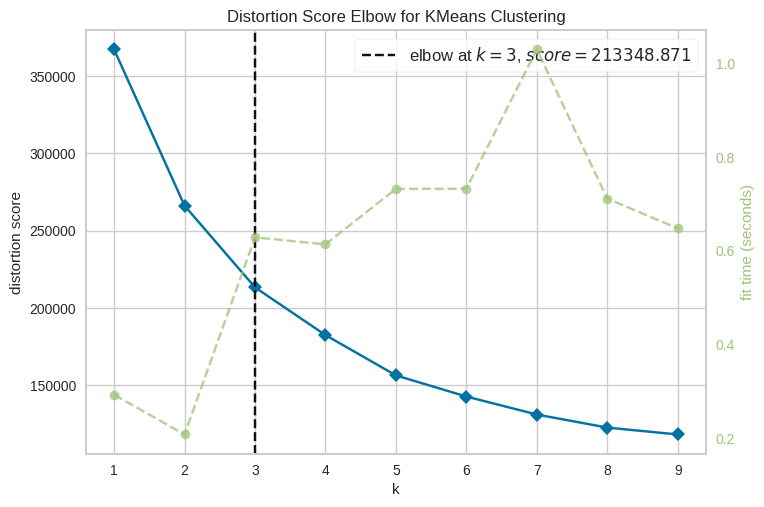

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(df_Spotify[features])

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [27]:
'''
# Inisialisasi model KMeans
kmeans = KMeans(n_clusters=3, random_state=1)

# Fit dan prediksi cluster
clusters = kmeans.fit_predict(df_Spotify[features])
'''
# 2. K-Means Clustering
kmeans = KMeans(n_clusters=3)  # Menentukan jumlah cluster (misalnya 3 cluster)
clusters = kmeans.fit_predict(df_Spotify[['pca1', 'pca2']])

# Tambahkan kolom cluster ke dataset
df_Spotify["cluster"] = clusters

# Output hasil
print(df_Spotify.head())


                                                name  duration_ms  year  \
0                          !Que Vida! - Mono Version    -0.089785  1966   
2                                        "40" - Live    -0.043225  1983   
5                                               "45"    -0.238935  2012   
7                                "A" You're Adorable    -0.658414  1961   
8  "Addio, mio dolce amor!" from Edgar (Act III) ...     0.037124  1946   

   acousticness  danceability    energy  instrumentalness  loudness  \
0      0.088342      0.349942  0.188732         -0.511130 -0.081674   
2     -1.041701     -1.522271  0.727908         -0.473954  0.286059   
5     -1.305087     -1.276829  1.798771         -0.521033  1.175529   
7     -0.025938      0.435562 -0.429073         -0.521033  0.173701   
8      1.297585     -2.161563 -1.196650         -0.517851 -1.190367   

   speechiness     tempo   valence  mode  key  popularity  explicit  \
0    -0.408876  0.289982  0.053638     1    9      

## **b. Evaluasi Model Clustering**

In [28]:
# Evaluasi inertia
print(f"Inertia: {kmeans.inertia_}")

Inertia: 97197.63749767974


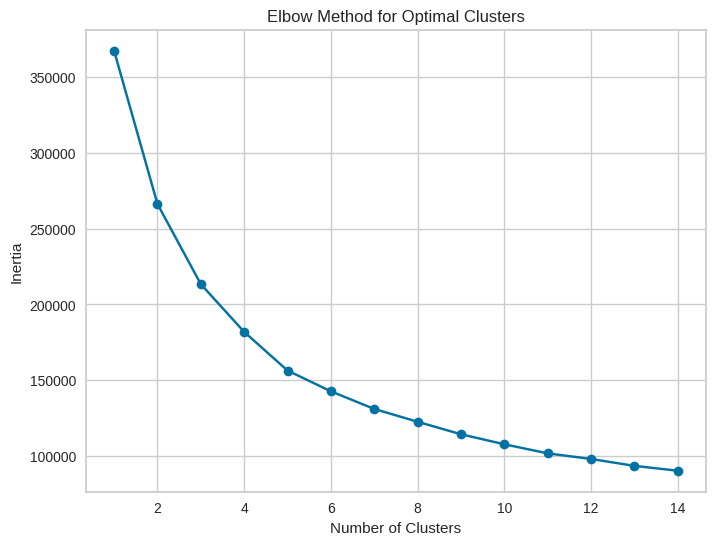

In [29]:
# Evaluasi jumlah cluster dengan Elbow Method
inertia_values = []
range_clusters = range(1, 15)

for k in range_clusters:
    kmeans_temp = KMeans(n_clusters=k, random_state=1)
    kmeans_temp.fit(df_Spotify[features])
    inertia_values.append(kmeans_temp.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range_clusters, inertia_values, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


In [30]:
'''

# Hitung Silhouette Score
silhouette_avg = silhouette_score(df_Spotify[features], clusters)
print(f"Silhouette Score: {silhouette_avg:.4f}")'''


'\n\n# Hitung Silhouette Score\nsilhouette_avg = silhouette_score(df_Spotify[features], clusters)\nprint(f"Silhouette Score: {silhouette_avg:.4f}")'

In [31]:
# 3. Menghitung Silhouette Score
silhouette_avg = silhouette_score(df_Spotify[['pca1', 'pca2']], df_Spotify['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.3879425600009217


In [32]:
# Rata-rata fitur per cluster
cluster_summary = df_Spotify.groupby("cluster")[features].mean()
print(cluster_summary)

         acousticness  danceability  instrumentalness  speechiness     tempo  \
cluster                                                                        
0            0.665170     -0.486185         -0.495997    -0.331074 -0.614118   
1           -0.369370      0.782012         -0.501448    -0.271430 -0.102872   
2           -0.672673     -0.416263         -0.499355    -0.258891  0.957194   

          valence  
cluster            
0       -0.672088  
1        0.833093  
2       -0.213204  


## **c. Feature Selection (Opsional)**

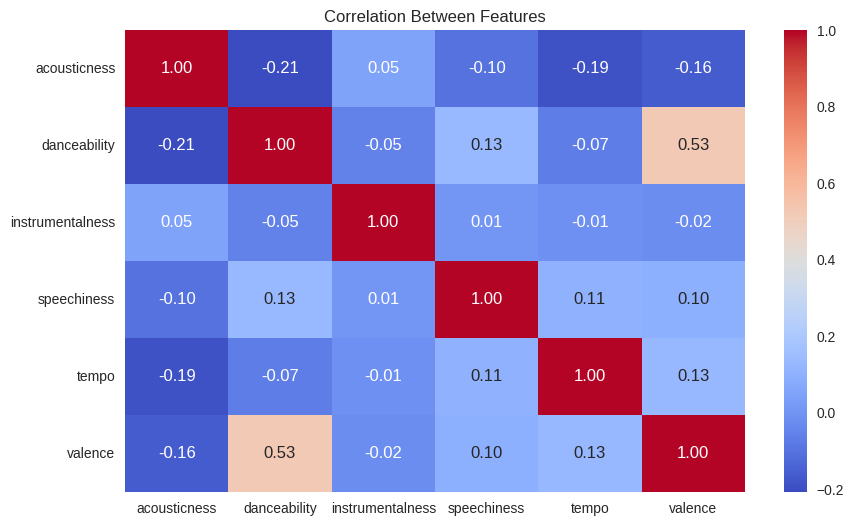

In [33]:

plt.figure(figsize=(10, 6))
sns.heatmap(df_Spotify[features].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Between Features")
plt.show()


In [34]:
# Hapus salah satu fitur yang berkorelasi tinggi (jika diperlukan)
# Misalnya: Hapus "valence" karena berkorelasi tinggi dengan "danceability"
selected_features_optimized = ["acousticness", "danceability", "instrumentalness", "speechiness", "tempo"]
data_selected_optimized = df_Spotify[selected_features_optimized]


In [35]:
#Dimensionality Reduction menggunakan PCA
pca = PCA(n_components=2)  # Mengurangi dimensi menjadi 2 untuk visualisasi
df_Spotify_reduced = pca.fit_transform(df_Spotify[selected_features_optimized])

# Menambahkan hasil PCA ke DataFrame
df_Spotify['pca3'] = df_Spotify_reduced[:, 0]
df_Spotify['pca4'] = df_Spotify_reduced[:, 1]


In [36]:
# 2. K-Means Clustering
kmeans = KMeans(n_clusters=3)
clusters_optimized = kmeans.fit_predict(df_Spotify[['pca3', 'pca4']])


In [37]:
# Tambahkan kolom cluster ke dataset
df_Spotify["clusters_optimized"] = clusters_optimized

# Output hasil
print(df_Spotify.head())

                                                name  duration_ms  year  \
0                          !Que Vida! - Mono Version    -0.089785  1966   
2                                        "40" - Live    -0.043225  1983   
5                                               "45"    -0.238935  2012   
7                                "A" You're Adorable    -0.658414  1961   
8  "Addio, mio dolce amor!" from Edgar (Act III) ...     0.037124  1946   

   acousticness  danceability    energy  instrumentalness  loudness  \
0      0.088342      0.349942  0.188732         -0.511130 -0.081674   
2     -1.041701     -1.522271  0.727908         -0.473954  0.286059   
5     -1.305087     -1.276829  1.798771         -0.521033  1.175529   
7     -0.025938      0.435562 -0.429073         -0.521033  0.173701   
8      1.297585     -2.161563 -1.196650         -0.517851 -1.190367   

   speechiness     tempo  ...  key  popularity  explicit  artists_encoded  \
0    -0.408876  0.289982  ...    9          2

In [38]:
'''from sklearn.metrics import silhouette_score

# Coba clustering dengan fitur terpilih
kmeans = KMeans(n_clusters=3, random_state=1)
clusters_optimized = kmeans.fit_predict(data_selected_optimized)

# Evaluasi dengan Silhouette Score
silhouette_optimized = silhouette_score(data_selected_optimized, clusters_optimized)
print(f"Silhouette Score with Optimized Features: {silhouette_optimized:.4f}")'''


# 3. Menghitung Silhouette Score
silhouette_avg = silhouette_score(df_Spotify[['pca3', 'pca4']], df_Spotify['clusters_optimized'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.40720625469661703


**Kesimpulan Analisis Silhouette Score**  

- **Silhouette Score Sebelum Feature Selection (0.3879)**:  
   Hasil clustering awal menunjukkan bahwa kualitas segmentasi cukup baik, tetapi ada tumpang tindih antar cluster. Nilai ini menunjukkan bahwa ada ruang untuk perbaikan dalam pemisahan cluster.

- **Silhouette Score Setelah Feature Selection (0.4072)**:  
   Setelah dilakukan pemilihan fitur, Silhouette Score meningkat sebesar **0.0193**. Hal ini menunjukkan bahwa feature selection berhasil meningkatkan kualitas clustering, meskipun perubahannya relatif kecil. Pemilihan fitur membantu algoritma clustering lebih fokus pada atribut yang relevan, sehingga meningkatkan pemisahan antar cluster.



## **d. Visualisasi Hasil Clustering**

In [39]:
'''from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduksi dimensi ke 2 komponen menggunakan PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_Spotify[features])

# Membuat DataFrame untuk visualisasi
df_pca = pd.DataFrame(reduced_data, columns=["PCA1", "PCA2"])
df_pca["cluster"] = df_Spotify["cluster"]

# Plot hasil cluster
plt.figure(figsize=(12, 8))
sns.scatterplot(x="PCA1",
                y="PCA2",
                hue="cluster",
                data=df_pca,
                palette="tab10",
                legend="full")
plt.title("KMeans Clustering (10 Clusters)")
plt.show()'''


'from sklearn.decomposition import PCA\nimport matplotlib.pyplot as plt\n\n# Reduksi dimensi ke 2 komponen menggunakan PCA\npca = PCA(n_components=2)\nreduced_data = pca.fit_transform(df_Spotify[features])\n\n# Membuat DataFrame untuk visualisasi\ndf_pca = pd.DataFrame(reduced_data, columns=["PCA1", "PCA2"])\ndf_pca["cluster"] = df_Spotify["cluster"]\n\n# Plot hasil cluster\nplt.figure(figsize=(12, 8))\nsns.scatterplot(x="PCA1",\n                y="PCA2",\n                hue="cluster",\n                data=df_pca,\n                palette="tab10",\n                legend="full")\nplt.title("KMeans Clustering (10 Clusters)")\nplt.show()'

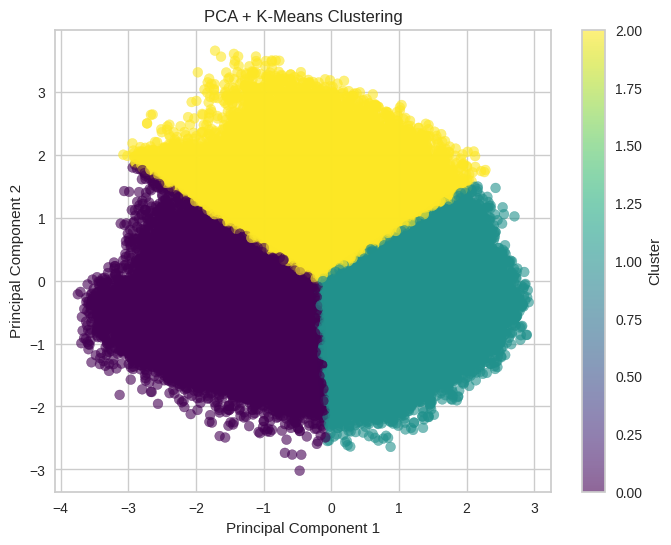

In [40]:
# Visualisasi hasil PCA dan clustering
plt.figure(figsize=(8, 6))

plt.scatter(df_Spotify['pca1'],
            df_Spotify['pca2'],
            c=df_Spotify['cluster'],
            cmap='viridis',
            s=50,
            alpha=0.6,)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA + K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()

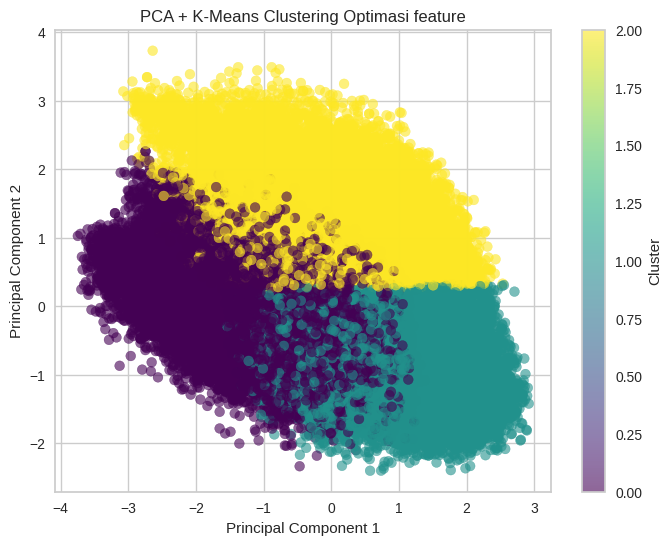

In [41]:
# 4. Visualisasi hasil PCA dan clustering optimasi
plt.figure(figsize=(8, 6))

plt.scatter(df_Spotify['pca1'],
            df_Spotify['pca4'],
            c=df_Spotify['clusters_optimized'],
            cmap='viridis',
            s=50,
            alpha=0.6)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA + K-Means Clustering Optimasi feature')
plt.colorbar(label='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

In [49]:
# Rata-rata fitur per cluster
cluster_summary = df_Spotify.groupby("cluster")[features].mean()
print(cluster_summary)

         acousticness  danceability  instrumentalness  speechiness     tempo  \
cluster                                                                        
0            0.665170     -0.486185         -0.495997    -0.331074 -0.614118   
1           -0.369370      0.782012         -0.501448    -0.271430 -0.102872   
2           -0.672673     -0.416263         -0.499355    -0.258891  0.957194   

          valence  
cluster            
0       -0.672088  
1        0.833093  
2       -0.213204  


Dari tabel di atas, dapat dilihat nilai rata-rata fitur yang terstandarisasi untuk setiap cluster. Berikut adalah interpretasi karakteristik masing-masing cluster berdasarkan data tersebut:  

### **Cluster 0**  
- **Acousticness (0.665)**: Tinggi, menunjukkan bahwa cluster ini cenderung terdiri dari lagu dengan karakteristik akustik yang dominan.  
- **Danceability (-0.486)**: Rendah, mengindikasikan lagu-lagu ini kurang cocok untuk menari.  
- **Instrumentalness (-0.496)**: Rendah, menunjukkan bahwa lagu dalam cluster ini lebih cenderung memiliki vokal.  
- **Speechiness (-0.331)**: Rendah, mengindikasikan minimnya elemen berbicara dalam lagu.  
- **Tempo (-0.614)**: Rendah, menggambarkan lagu dengan tempo yang lebih lambat.  
- **Valence (-0.672)**: Rendah, menunjukkan lagu dengan nuansa yang lebih gelap atau emosional.  

**Kesimpulan Cluster 0**: Lagu-lagu di cluster ini cenderung akustik, lambat, dan lebih emosional, mungkin cocok untuk suasana santai atau reflektif.  

---

### **Cluster 1**  
- **Acousticness (-0.369)**: Rendah, menunjukkan karakteristik yang kurang akustik.  
- **Danceability (0.782)**: Tinggi, mengindikasikan bahwa lagu di cluster ini sangat cocok untuk menari.  
- **Instrumentalness (-0.501)**: Rendah, menunjukkan lagu ini umumnya memiliki vokal.  
- **Speechiness (-0.271)**: Rendah, mengindikasikan elemen berbicara dalam lagu tidak dominan.  
- **Tempo (-0.103)**: Sedang, tempo lagu berada di tingkat moderat.  
- **Valence (0.833)**: Tinggi, menunjukkan lagu-lagu dengan nuansa ceria dan positif.  

**Kesimpulan Cluster 1**: Lagu-lagu di cluster ini cenderung energik, ceria, dan cocok untuk suasana pesta atau kegiatan aktif.  

---

### **Cluster 2**  
- **Acousticness (-0.673)**: Rendah, menunjukkan karakteristik yang jauh dari akustik.  
- **Danceability (-0.416)**: Rendah, sehingga lagu-lagu ini kurang cocok untuk menari.  
- **Instrumentalness (-0.499)**: Rendah, lagu-lagu ini cenderung memiliki vokal.  
- **Speechiness (-0.259)**: Rendah, elemen berbicara tidak dominan.  
- **Tempo (0.957)**: Tinggi, menggambarkan lagu dengan tempo cepat.  
- **Valence (-0.213)**: Sedang ke rendah, menunjukkan nuansa yang netral atau sedikit gelap.  

**Kesimpulan Cluster 2**: Lagu-lagu di cluster ini cenderung cepat, namun tidak terlalu cocok untuk menari, dengan nuansa yang lebih serius atau netral.  

---

### **Rekomendasi Selanjutnya**  
1. **Analisis Pola Penggunaan**:  
   - **Cluster 0** mungkin cocok untuk playlist bertema relaksasi atau meditasi.  
   - **Cluster 1** sangat ideal untuk playlist pesta atau aktivitas energik.  
   - **Cluster 2** dapat digunakan dalam playlist olahraga yang membutuhkan tempo cepat.  

2. **Perbaikan Clustering**:  
   - Analisis lebih lanjut apakah fitur lain, seperti genre atau popularitas, dapat menambah insight untuk setiap cluster.  



In [50]:
# Rata-rata fitur per cluster with Feature Selection
cluster_summary = df_Spotify.groupby("clusters_optimized")[selected_features_optimized].mean()
print(cluster_summary)

                    acousticness  danceability  instrumentalness  speechiness  \
clusters_optimized                                                              
0                       0.808611     -0.299465         -0.494794    -0.313729   
1                      -0.731006      0.747986         -0.502905    -0.277932   
2                      -0.508246     -0.489976         -0.499469    -0.258852   

                       tempo  
clusters_optimized            
0                  -0.527293  
1                  -0.178774  
2                   1.176624  


Berikut adalah analisis karakteristik masing-masing cluster berdasarkan data dari tabel:  

### **Cluster 0**  
- **Acousticness (0.808)**: Tinggi, menunjukkan lagu-lagu dalam cluster ini memiliki karakteristik akustik yang dominan.  
- **Danceability (-0.299)**: Rendah, sehingga kurang cocok untuk menari.  
- **Instrumentalness (-0.495)**: Rendah, menunjukkan adanya vokal dalam lagu-lagu ini.  
- **Speechiness (-0.314)**: Rendah, elemen berbicara dalam lagu tidak dominan.  
- **Tempo (-0.527)**: Rendah, menggambarkan lagu dengan tempo yang lebih lambat.  

**Kesimpulan Cluster 0**: Lagu-lagu di cluster ini cenderung akustik, lambat, dan lebih cocok untuk suasana santai atau reflektif.  

---

### **Cluster 1**  
- **Acousticness (-0.731)**: Rendah, menunjukkan karakteristik yang jauh dari akustik.  
- **Danceability (0.748)**: Tinggi, mengindikasikan lagu-lagu ini sangat cocok untuk menari.  
- **Instrumentalness (-0.503)**: Rendah, menunjukkan lagu ini cenderung memiliki vokal.  
- **Speechiness (-0.278)**: Rendah, elemen berbicara tidak dominan.  
- **Tempo (-0.179)**: Moderat, lagu-lagu dalam cluster ini memiliki tempo yang tidak terlalu lambat atau cepat.  

**Kesimpulan Cluster 1**: Lagu-lagu di cluster ini sangat cocok untuk suasana pesta atau kegiatan aktif dengan nuansa energik.  

---

### **Cluster 2**  
- **Acousticness (-0.508)**: Rendah, lagu-lagu ini memiliki karakteristik yang tidak terlalu akustik.  
- **Danceability (-0.490)**: Rendah, menunjukkan lagu-lagu ini kurang cocok untuk menari.  
- **Instrumentalness (-0.499)**: Rendah, menunjukkan adanya vokal dalam lagu.  
- **Speechiness (-0.259)**: Rendah, elemen berbicara tidak dominan.  
- **Tempo (1.177)**: Tinggi, lagu-lagu ini memiliki tempo yang sangat cepat.  

**Kesimpulan Cluster 2**: Lagu-lagu di cluster ini memiliki tempo cepat, namun kurang cocok untuk menari, dan mungkin lebih cocok untuk aktivitas yang membutuhkan energi tinggi seperti olahraga.  

---

### **Rekomendasi Selanjutnya**  

1. **Pemanfaatan Pola dalam Cluster**:  
   - **Cluster 0**: Ideal untuk playlist bertema relaksasi, akustik, atau meditasi.  
   - **Cluster 1**: Cocok untuk playlist pesta, hiburan, atau kegiatan energik.  
   - **Cluster 2**: Tepat untuk playlist olahraga atau aktivitas yang membutuhkan dorongan tempo tinggi.  



# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [43]:
df_Spotify.to_csv("Spotify_Clustered.csv", index=False)